In [1]:
import numpy as np
import gmpy2
import gmpy2.gmpy2
from gmpy2 import mpfr
import copy
import pickle
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
import matplotlib.image as mpimg
import matplotlib.lines as mlines

# custom made packages
from sys import path
path.append('./../')
import src as pnp
import src.constants as constants

from importlib import reload

## load results

In [2]:
df = pnp.load_parameter_overview()
df

found files:  ['results_test_run1.pcl', 'results_test_run0.pcl', 'results_test_run2.pcl', 'results_test_run6.pcl', 'results_test_run7.pcl', 'results_test_run5.pcl', 'results_test_run11.pcl', 'results_test_run10.pcl', 'results_test_run3.pcl']
open : /home/work/Projects/spineIonConcentrations/results/results_test_run1.pcl


,domain,membrane_potential,d_phi_in,d_phi_ext,d_phi_in_min,d_phi_in_max,d_phi_ext_min,d_phi_ext_max,r_in,r_mem,...,chem_f_pos_in,chem_f_pos_ext,chem_f_neg_in,chem_f_neg_ext,pnp_lhs_in,pnp_lhs_ext,pnp_rhs_in,pnp_rhs_ext,date,experiment_id
experiment_id,,,,,,,,,,,,,,,,,,,,,
0,head,-0.071,-7.4989241420280345176255633782207231705843838...,-0.0257889874913037091958001312264059379231184...,-1.2618984341147823288742380043458979343995451...,-7.4256878542530106029895264896367734763771295...,-4.4627299448781386106597534944921154270610540...,-0.0259965313910217337214914046228386723669245...,2.000000e-08,2.500000e-08,...,-3.975788e+07,9.002236,3.975791e+07,-3.975788e+07,0.0,0.0,0.0,0.0,2020-08-28 15:05:47.884220,0
1,head,-0.070,-7.5017200047959541478591963381282518359479715...,-0.0257810129295329360649136063443620514590293...,-1.2618984341147823288742380043458979343995451...,-7.4285358617383247942234092420221713837236166...,-4.4627299448781386106597534944921154270610540...,-0.0259885085857113855636879584665166476042941...,2.000000e-08,2.500000e-08,...,-3.977957e+07,8.952676,3.977960e+07,-3.977957e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:27.925538,1
2,head,-0.069,-7.5045147544015075417197046774637506981999073...,-0.0257730377401511164675573795079799310769885...,-1.2618984341147823288742380043458979343995451...,-7.4313827170506118607873347059467050712555646...,-4.4627299448781386106597534944921154270610540...,-0.0259804851551189085537285627935943921329453...,2.000000e-08,2.500000e-08,...,-3.980126e+07,8.451528,3.980129e+07,-3.980126e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:22.738278,2
3,head,-0.036,-7.5961173766653066741859056751673863312399113...,-0.0255095149378398295542114126988053612876683...,-1.2618984341147823288742380043458979343995451...,-7.5246866711330909899269059337711951229721307...,-4.4627299448781386106597534944921154270610540...,-0.0257153614872918297520887342955120402621105...,2.000000e-08,2.500000e-08,...,-4.051649e+07,11.624314,4.051652e+07,-4.051649e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:27.125418,3
4,head,-0.035,-7.5988743433346827662842673005640079819483675...,-0.0255015192811233155217864876362909853924065...,-1.2618984341147823288742380043458979343995451...,-7.5274947243752967501739803424243291374295949...,-4.4627299448781386106597534944921154270610540...,-0.0257073168267753731849878384707608347525820...,2.000000e-08,2.500000e-08,...,-4.053815e+07,6.228888,4.053818e+07,-4.053815e+07,0.0,0.0,0.0,0.0,2020-08-28 15:06:28.366764,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,neck,0.000,-1.7295675971588218670926817566169120254926383...,-0.02531717531383037567138671875,-2.8061802498996257781982421875000000000000000...,-1.7141205258667469024658203125000000000000000...,1.92545223133591157379967091599191587252594544...,-0.0255279188975691795349121093749999999999999...,1.000000e-08,1.500000e-08,...,-4.130112e+07,-94239.868685,4.130115e+07,-4.130112e+07,0.0,0.0,0.0,0.0,2020-09-03 14:40:30.471610,139
140,neck,0.001,-1.7301877113695784786429054946665928582660853...,-0.0253086615353822708129882812499999999999999...,-2.8061802498996257781982421875000000000000000...,-1.7147333361208438873291015625000000000000000...,1.92545223133591157379967091599191587252594544...,-0.0255196062847971916198730468749999999999999...,1.000000e-08,1.500000e-08,...,-4.132311e+07,23029.412158,4.132314e+07,-4.132311e+07,0.0,0.0,0.0,0.0,2020-09-03 14:40:27.872728,140
141,neck,0.034,-1.7499060046580965956108943970548352808691561...,-0.02503578551113605499267578125,-2.8061802498996257781982421875000000000000000...,-1.7348212189972400665283203125e-06,1.92545223133591157379967091599191587252594544...,-0.025244918651878833770751953125,1.000000e-08,1.500000e-08,...,-4.202657e+07,17309.778803,4.202661e+07,-4.202657e+07,0.0,0.0,0.0,0.0,2020-09-03 14:40:30.486039,141


# Figure 02


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


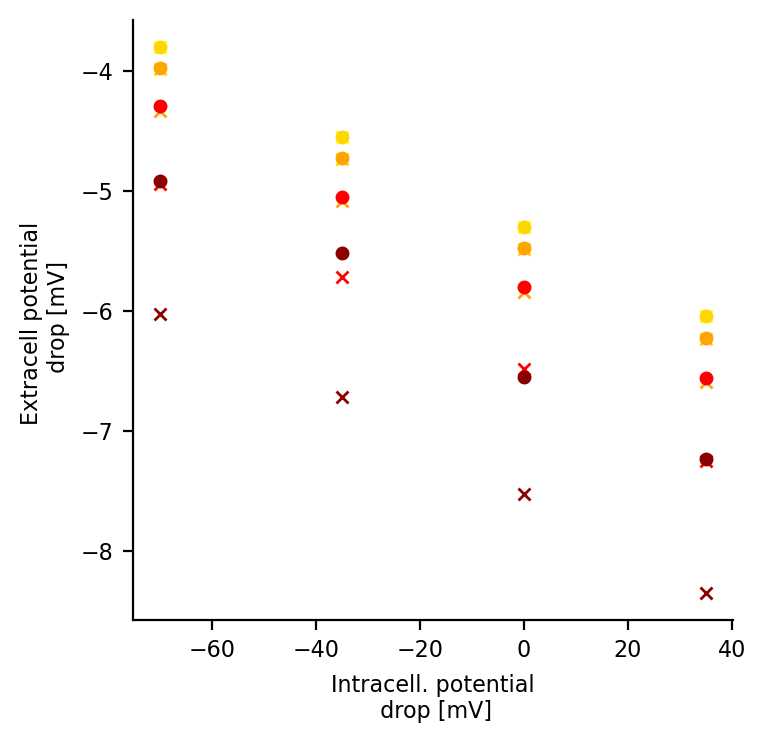

In [3]:
def plot_v_mem_cap_vs_pnp(fig, pos, df):
    ax = fig.add_axes(pos)
    
    markers = {'head': 'x', 'neck': 'o'}
    colors= {10.e-9: 'darkred',
            20.e-9:'red',
            40.e-9: 'orange',
            80.e-9: 'gold',
            160.e-9: 'yellow'}
    
    x_vals = []
    y_vals = []
    c = []
    m = []
    
    d_mem = df.loc[:, 'r_mem'].values - df.loc[:, 'r_in'].values
    delta_phi =  df.loc[:, 'v_in'].values- df.loc[:, 'v_mem'].values
    v_mem = df.loc[:, 'membrane_potential'].values
    r_in = df.loc[:, 'r_in'].values
    geom = df.loc[:, 'domain'].values
    
    delta_phi_in =  df.loc[:, 'v_in'].values
    delta_phi_ext =  df.loc[:, 'v_ext'].values- df.loc[:, 'v_mem'].values
    
    #print(np.shape(delta_phi), np.shape(v_mem),delta_phi)
    
    for i,v in enumerate(v_mem):
        if v in [-0.07, -0.035, 0.0, 0.035]:
            x_vals.append(v*1000.)
            y_vals.append(delta_phi_in[i]*1000.+ delta_phi_ext[i]*1000.)
            c.append(colors[r_in[i]])
            m.append(markers[geom[i]])
    for i in range(len(m)):
        ax.plot( x_vals[i], y_vals[i], 'kx', ms=4, marker=m[i],
                   color=c[i])
    #ax.plot([-35, 0], 
    #        [35, 0], color='grey', linestyle='--', zorder=-1)
    
    #ax.legend(fontsize=8, frameon=False, loc=(0.7, 0.8))
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    #ax.set_ylim((24,34))
    #ax.set_xlim((-34,-24))
    #ax.set_xticks([-0.07, -0.035, 0.0, 0.035])
    #ax.set_yticks([-0.07, -0.035, 0.0, 0.035])
    #ax.set_xticklabels(np.array(ax.get_xticks()*1.e3, dtype=np.int))
    #ax.set_yticklabels(np.array(ax.get_xticks()*1.e3, dtype=np.int))

    ax.set_xlabel('Intracell. potential\n drop [mV]', fontsize=8)
    ax.set_ylabel('Extracell potential \n drop [mV]', fontsize=8)
    
    ax.tick_params(labelsize=8)
    
fig = plt.figure(figsize=(3,3),dpi=200)
plot_v_mem_cap_vs_pnp(fig,[0,0,1,1],df)
plt.show()

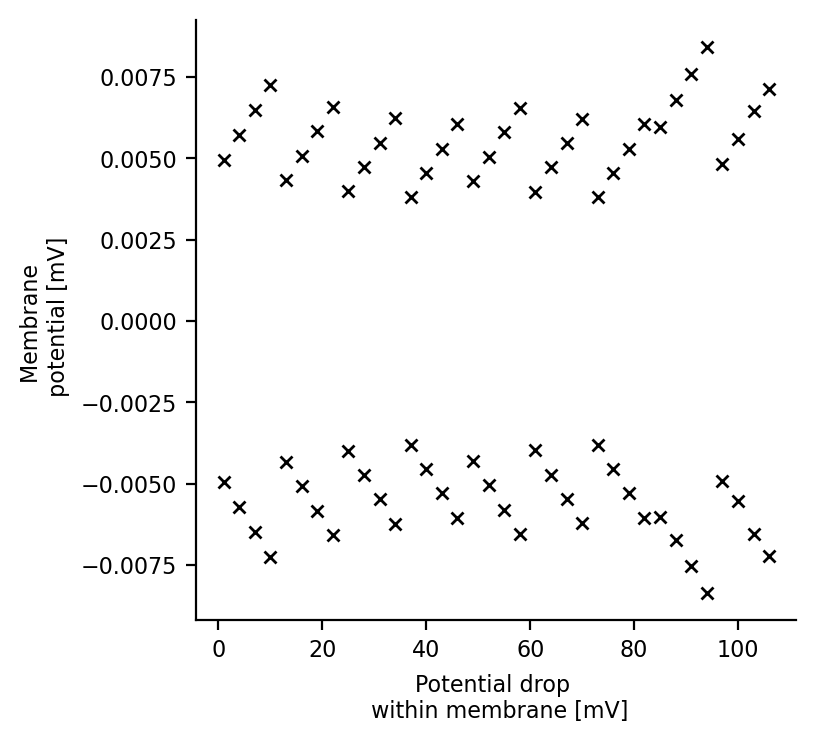

In [4]:
def plot_v_mem_cap_vs_pnp(fig, pos, df):
    ax = fig.add_axes(pos)
    
    d_mem = df.loc[:, 'r_mem'].values - df.loc[:, 'r_in'].values
    delta_phi =  df.loc[:, 'v_in'].values- df.loc[:, 'v_mem'].values
    v_mem = df.loc[:, 'membrane_potential'].values
    
    delta_phi_in =  df.loc[:, 'v_in'].values
    delta_phi_ext =  df.loc[:, 'v_ext'].values- df.loc[:, 'v_mem'].values
    
    #print(np.shape(delta_phi), np.shape(v_mem),delta_phi)
    
    for i,v in enumerate(v_mem):
        if v in [-0.07, -0.035, 0.0, 0.035]:
            ax.plot([i], delta_phi_in[i] + delta_phi_ext[i], 'kx', ms=4)
            ax.plot([i], v_mem[i] - delta_phi[i], 'kx', ms=4)
    #ax.plot([-0.02465, -0.027], 
    #        [0.02465, 0.027], color='grey', linestyle='--', zorder=-1)
    
    #ax.legend(fontsize=8, frameon=False, loc=(0.7, 0.8))
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #ax.set_xticks([-0.07, -0.035, 0.0, 0.035])
    #ax.set_yticks([-0.07, -0.035, 0.0, 0.035])
    #ax.set_xticklabels(np.array(ax.get_xticks()*1.e3, dtype=np.int))
    #ax.set_yticklabels(np.array(ax.get_xticks()*1.e3, dtype=np.int))

    ax.set_ylabel('Membrane \n potential [mV]', fontsize=8)
    ax.set_xlabel('Potential drop \n within membrane [mV]', fontsize=8)
    
    ax.tick_params(labelsize=8)
    
fig = plt.figure(figsize=(3,3),dpi=200)
plot_v_mem_cap_vs_pnp(fig,[0,0,1,1],df)
plt.show()

figsize:  4.15 7.35
experiment_id
25    1.650000e-07
34    1.650000e-07
Name: r_ext, dtype: float64
experiment_id
25    1.650000e-07
34    1.650000e-07
Name: r_ext, dtype: float64
0.012001521833412996 0.010484976666150803
double layer size:  7.756930577013694e-10
0.011809858372228112 0.010337549337383563
double layer size:  7.667799034775612e-10
0.011799045303270578 0.010352975545505004
double layer size:  7.582087368983347e-10
0.0117847399330061 0.010353781604460847
double layer size:  7.543205204787896e-10
0.012242993323496912 0.01065364652326638
double layer size:  8.004869488685771e-10
intracellular
0.012001521833412996 0.010484976666150803
intracellular
0.011809858372228112 0.010337549337383563
intracellular
0.011799045303270578 0.010352975545505004
intracellular
0.0117847399330061 0.010353781604460847
intracellular
0.012242993323496912 0.01065364652326638
double layer size: [7.97889867e-10 7.71809960e-10 7.59195834e-10 7.53072298e-10
 7.50021115e-10]
extracellular
0.0105278602895

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


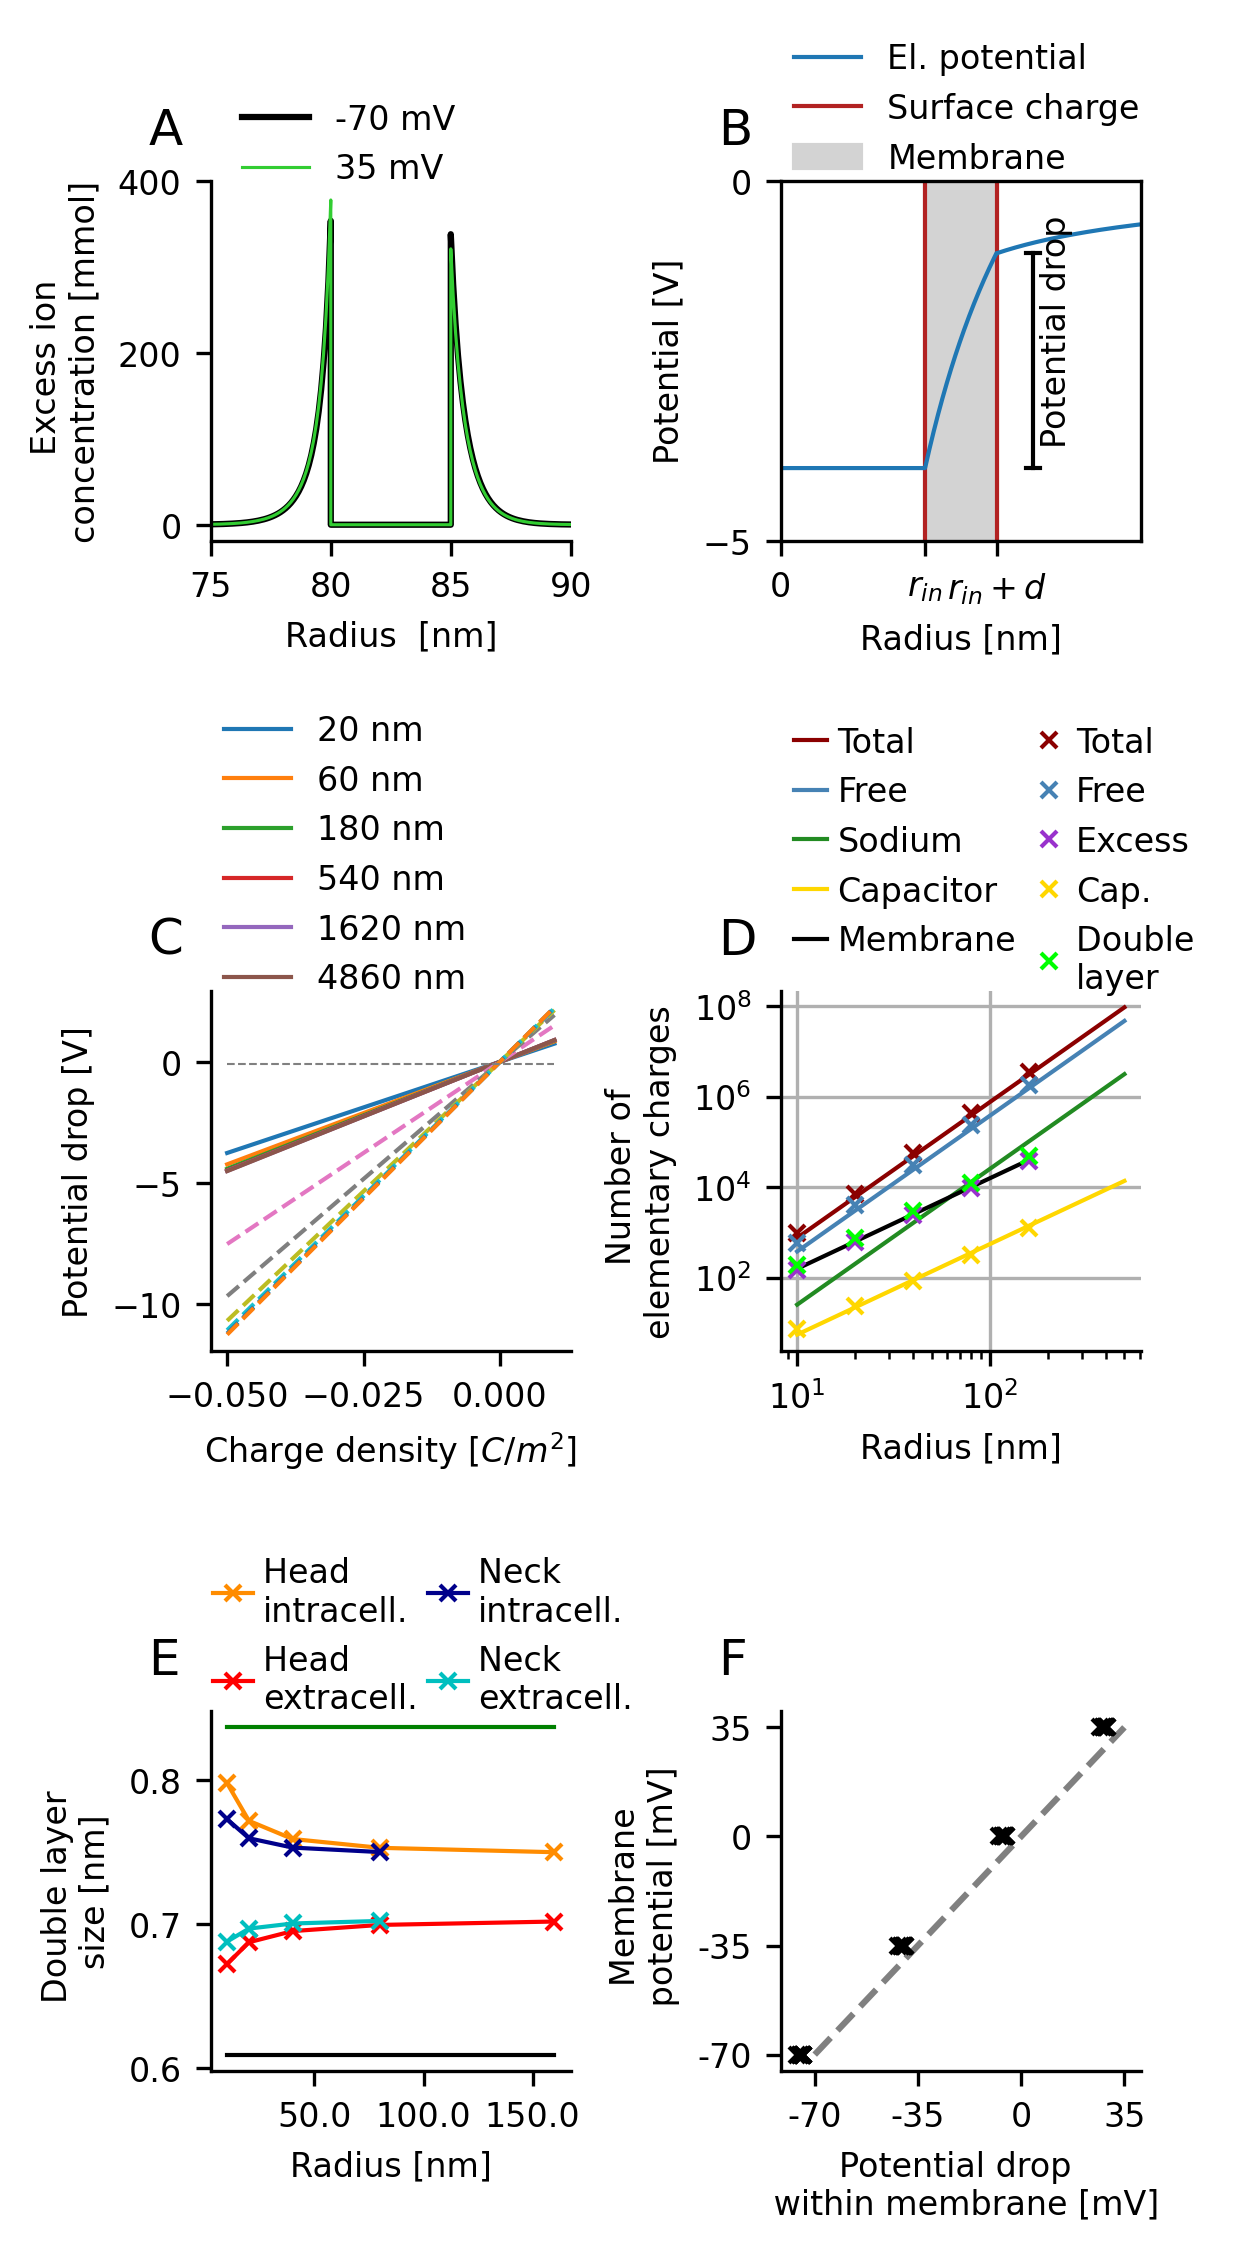

In [5]:

dx=0.7
dy=0.5
legh1 = 0.7
legh2 = 1.0
legh3 = 0.3
ax_width = 1.2
ax_height = ax_width

fig_width = 2.5 * dx + 2 * ax_width

fig_height = 3.5 * dy + 3 * ax_height + legh1 + legh2 + legh3
x1 = dx / fig_width
x2 = (2*dx + ax_width) / fig_width
y1 = dy / fig_height
y2 = (2*dy + ax_height + legh1) / fig_height
y3 = (3*dy + 2*ax_height + legh1 + legh2) / fig_height
wx = ax_width /fig_width
wy = ax_height /fig_height

posA = [x1, y3, wx, wy]
posB = [x2, y3, wx, wy]
posC = [x1, y2, wx, wy]
posD = [x2, y2, wx, wy]
posE = [x1, y1, wx, wy]
posF = [x2, y1, wx, wy]

print('figsize: ', fig_width, fig_height)

fig_2 = plt.figure(figsize=(fig_width, fig_height), dpi=300)




############
# A 
id1 = pnp.search_index(df, {'r_in': 80e-9, 'membrane_potential':-0.07, 'domain': 'head'})
id2 = pnp.search_index(df, {'r_in': 80e-9, 'membrane_potential':0.035, 'domain': 'head'})
ids = np.concatenate((id1 , id2))
df_dl = df.loc[ids] 
pnp.plot_excess_charge_distributions(fig_2, posA, df_dl, ids)

#################
# B & C
pnp.potential_drop_through_membrane_charge(fig_2, posB, posC)

############################
# D
param_dict = {'membrane_potential': -0.07, 'domain': 'head'}
ids = pnp.search_index(df, param_dict)    


param_dict = {'membrane_potential': -0.07, 'domain': 'head'}
param_dict_depol = {'membrane_potential': 0.0, 'domain': 'head'}

ids = pnp.search_index(df, param_dict)
cap_ids = pnp.search_index(df, param_dict_depol)
all_ids = np.concatenate((ids, cap_ids))

df_tmp = df.loc[all_ids]
pnp.number_of_charges_vs_radius(fig_2, posD, df_tmp)


##########################
# E 
param_dict = {'membrane_potential': -0.07}
ids = pnp.search_index(df, param_dict)
df_dl = df.loc[ids] 
pnp.plot_double_layer_size(fig_2, posE, df_dl, x_axis='radius')

###########################
# F
pnp.plot_v_mem_cap_vs_pnp(fig_2, posF, df)

###################
# frame
#ax_frame = fig_2.add_axes([0,0,1,1])
#ax_frame.set_xticks([])
#ax_frame.set_yticks([])
#ax_frame.set_facecolor('none')

dxt = -0.05
dyt = 0.18
fig_2.text(posA[0]+dxt, posA[1]+dyt, 'A', fontsize=12)
fig_2.text(posB[0]+dxt, posB[1]+dyt, 'B', fontsize=12)
fig_2.text(posC[0]+dxt, posC[1]+dyt, 'C', fontsize=12)
fig_2.text(posD[0]+dxt, posD[1]+dyt, 'D', fontsize=12)
fig_2.text(posE[0]+dxt, posE[1]+dyt, 'E', fontsize=12)
fig_2.text(posF[0]+dxt, posF[1]+dyt, 'F', fontsize=12)

plt.savefig('./../../../../PaperSpineElectrodiffusion/figures/ion_concentrations/Figure02.png')
plt.savefig('./../../../../PaperSpineElectrodiffusion/figures/ion_concentrations/Figure02.tif')
plt.savefig('./../../../../PaperSpineElectrodiffusion/figures/ion_concentrations/Figure02.eps')
plt.show()

Electroneutrality

    a) excess ion-concentatration as sum of (c_+ - c_-) * e. Excess charges exist close to the mebrane surface. On both sides of the membrane excess charge is strongly positive,irrespective of membrane voltage.
    b) In a purely hypothetical scenario the intracellular and extracellular space and the interior of the membrane are void of charges. The membrane carries surface charges. This would lead to a strongly negative membrane potential. 
    c) In this system (B) a reasonable parameter regime the membrane charge alone creates a membrane potential of serveral volts; much higher than the physiological resting potential of 0.07 V.
    d) Excess charges are higher than expected from membrane capacitance. The number of excess charges is comparable to the number of membrane charges but an order of magnitude lower than the total number of free charges in spines.
    e) distance where excess concentration drops to 1/e comparted to its peak is at the size of the Debye-length independent of radius
    f) Excess charges exist only close the membrane and are compensated by surface charges. The voltage drop across the membrane and with it the electric field are comparable to the capacitor model. 